# Spherical K-Means: Pattern Discovery in Textures

The classical k-means method of clustering minimizes the sum of squared distances between cluster centres and cluster members. The intuition is that the radial distance from the
Cluster- Centre should be similar for all elements of that cluster. The spherical k-means algorithm, however, is equivalent to the k-means algorithm with cosine similarity, a popular method for clustering high-dimensional data. The idea is to set the centre of each cluster such that it makes the angle between components both uniform and minimal.

__Question:__

Generate a dummy dataset using Scikit-Learn having high dimensionality (number of features >10) and total 4 classes. For this dataset, first implement K-Means clustering and then use the clusters for classification purpose. Now using the same dataset, implement spherical clustering and then check accuracy for classification. Notice the change in accuracy. You may also plot the obtained clusters from both the methods using t-SNE plots or by projecting data into two dimensions using PCA.

In [1]:
#Import sklearn daatasets, model selection, neural network, numpy, matplotlib
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,f1_score,plot_confusion_matrix

In [2]:
# Preparing/Loading Dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=15,random_state=0,cluster_std=0.60)
df = pd.DataFrame(dict(x=X[:,0],y=X[:,1],label = y))
df

,x,y,label
0,-8.679523,-9.964645,1
1,2.752587,-6.004241,3
2,3.470801,-4.817432,3
3,4.387689,-5.888163,3
4,3.252530,-5.687885,3
...,...,...,...
995,-6.200652,5.231251,2
996,-7.747632,-10.028214,1
997,4.477079,-6.380839,3
998,0.376961,3.859705,0


In [3]:
X.shape

(1000, 15)

In [4]:
y

array([1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 3,
       2, 2, 0, 3, 3, 2, 3, 1, 2, 3, 0, 0, 3, 1, 3, 3, 1, 3, 1, 3, 1, 2,
       0, 2, 0, 1, 0, 0, 3, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0,
       2, 3, 2, 2, 0, 3, 2, 2, 1, 2, 3, 2, 3, 1, 0, 1, 3, 3, 0, 1, 3, 0,
       0, 2, 3, 0, 3, 2, 3, 0, 1, 1, 0, 3, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 1, 0, 2, 3, 3, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1,
       0, 2, 3, 2, 1, 0, 2, 3, 3, 0, 2, 3, 0, 0, 2, 2, 1, 0, 2, 3, 1, 3,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 3, 0, 3, 1, 1, 3, 0, 1,
       0, 0, 0, 0, 1, 3, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2,
       2, 0, 3, 2, 3, 0, 3, 2, 0, 0, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3,
       2, 3, 3, 2, 3, 3, 2, 0, 3, 0, 1, 2, 3, 1, 2, 3, 3, 1, 0, 3, 3, 3,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 3, 1, 1, 1, 0, 1, 3, 3, 0,
       0, 0, 3, 3, 2, 2, 3, 3, 1, 1, 3, 1, 2, 2, 0,

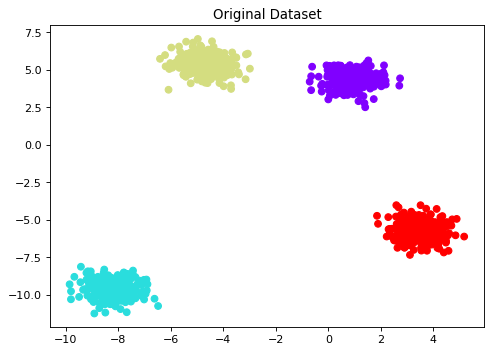

In [5]:
plt.figure(figsize=(7,5),dpi=80)
plt.scatter(df.x,df.y,c=df.label,cmap='rainbow')
plt.title("Original Dataset")
plt.show()

In [6]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=4,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) 

[[ 3.44361833 -5.79736372 -7.42166112 -3.72356921 -2.80201977  1.43344251
  -1.18667018  9.83663306 -7.96419017 -5.84115639 -6.78614716  3.05510517
  -4.95359905 -0.66264678 -5.14581615]
 [ 0.86154214  4.32999873  2.12187316  0.83350584 -1.50189875  2.87003529
  -1.22399669  7.77477494  9.2459541  -2.32011847  5.85360684  0.5192355
   1.33359186  8.51233262 -8.59835793]
 [-8.25410402 -9.6136771   6.59082183  5.57948739  7.38400342  9.5931288
   6.05097638 -0.78176196  5.58443099 -7.62229252  2.75823784 -7.09990491
   8.90400025  0.42898107 -1.70385359]
 [-4.71171758  5.41285798 -0.93977647  1.37209453 -9.64372832  2.38097096
   2.26615189  2.28926138  8.86396188  3.68029507 -2.81374589 -1.27678502
   3.94125859 -8.79294275  3.35258122]]


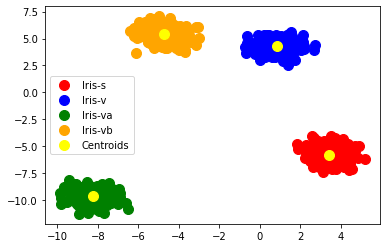

In [7]:

#Predicting the cluster for our data
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
#Visualising the clusters
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-s')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-v')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-va')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Iris-vb')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [8]:
print(classification_report(y,y_kmeans))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     250.0
           1       0.00      0.00      0.00     250.0
           2       0.00      0.00      0.00     250.0
           3       0.00      0.00      0.00     250.0

    accuracy                           0.00    1000.0
   macro avg       0.00      0.00      0.00    1000.0
weighted avg       0.00      0.00      0.00    1000.0



In [18]:
k = 4

In [19]:
def similarity(vec1, vec2):
    vec1 = np.ravel(vec1)
    vec1 = vec1/np.linalg.norm(vec1)
    
    vec2 = np.ravel(vec2)
    vec2 = vec2/np.linalg.norm(vec2)
    
    angle = np.dot(vec1, vec2)
    return angle# Fit training dataset

In [20]:
def init_centroids(K, data_arr, label_arr):
    mean_cent = []
    size_cent = []
    cluster_cent = [[] for i in range(K)]
    
    for i in range(len(data_arr)):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_cent[k].append(data_pt)
    for k in range(K):
        cluster_mat = np.matrix(cluster_cent[k])
        pointNum = cluster_mat.shape[0]
        mean_k = np.mean(cluster_mat, axis=0)
        mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
        mean_cent.append(mean_k)
        size_cent.append(pointNum)
    return mean_cent, size_cent

In [21]:
def label_update(prev_mean, data_arr, label_arr):
    for i in range(len(data_arr)):
        sim_pt = []
        for k in range(K):
            sim = similarity(data_arr[i], prev_mean[k])
            sim_pt.append(sim)
        sim_arr = np.array(sim_pt)
        new_label = np.argmax(sim_arr)
        label_arr[i] = new_label
    return label_arr

In [22]:
def update_centroids(K, prev_mean, prev_size, data_arr, label_arr):
    cluster_pts = [[] for k in range(K)]
    
    for i in range(data_arr.shape[0]):
        for k in range(K):
            if label_arr[i]==k:
                data_pt = np.ravel(data_arr[i,:])/np.linalg.norm(np.ravel(data_arr[i,:]))
                cluster_pts[k].append(data_pt)
    for k in range(K):
        print(len(cluster_pts[k]))
        if len(cluster_pts[k])!=0:
            cluster_mat = np.matrix(cluster_pts[k])
            pointNum = cluster_mat.shape[0]
            mean_k = np.mean(cluster_mat, axis=0)
            mean_k = np.ravel(mean_k)/np.linalg.norm(np.ravel(mean_k))
            prev_mean[k] = mean_k
            prev_size[k] = pointNum
        new_mean = prev_mean
        new_size = prev_size
    return new_mean, new_size

In [23]:
def SphericalKMeans(data_arr, label_arr, maxIter):
    prev_mean, prev_size = init_centroids(k, data_arr, label_arr)
    print(prev_size)
    for iter in range(maxIter):
        new_label = label_update(prev_mean, data_arr, label_arr)
        new_mean, new_size = update_centroids(k, prev_mean, prev_size, data_arr, label_arr)
        label_arr = new_label
        prev_mean = new_mean
        prev_size = new_size
        print(f"Iteration: {iter} is completed!")
    return new_mean, new_size,label_arr

In [24]:
mean_cent, size_cent,label_arr = SphericalKMeans(X, y, 30)

[250, 250, 250, 250]
250
250
250
250
Iteration: 0 is completed!
250
250
250
250
Iteration: 1 is completed!
250
250
250
250
Iteration: 2 is completed!
250
250
250
250
Iteration: 3 is completed!
250
250
250
250
Iteration: 4 is completed!
250
250
250
250
Iteration: 5 is completed!
250
250
250
250
Iteration: 6 is completed!
250
250
250
250
Iteration: 7 is completed!
250
250
250
250
Iteration: 8 is completed!
250
250
250
250
Iteration: 9 is completed!
250
250
250
250
Iteration: 10 is completed!
250
250
250
250
Iteration: 11 is completed!
250
250
250
250
Iteration: 12 is completed!
250
250
250
250
Iteration: 13 is completed!
250
250
250
250
Iteration: 14 is completed!
250
250
250
250
Iteration: 15 is completed!
250
250
250
250
Iteration: 16 is completed!
250
250
250
250
Iteration: 17 is completed!
250
250
250
250
Iteration: 18 is completed!
250
250
250
250
Iteration: 19 is completed!
250
250
250
250
Iteration: 20 is completed!
250
250
250
250
Iteration: 21 is completed!
250
250
250
250
Itera

In [25]:
mean_cent = np.array(mean_cent)
print(mean_cent.shape)
print(size_cent/np.sum(size_cent))

(4, 15)
[0.25 0.25 0.25 0.25]


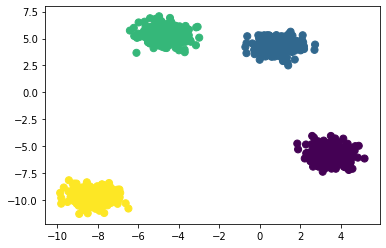

In [26]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.simplefilter("ignore")

model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [27]:
labels

array([3, 0, 0, 0, 0, 3, 0, 2, 3, 3, 1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 0, 3, 2, 0, 1, 1, 0, 3, 0, 0, 3, 0, 3, 0, 3, 2,
       1, 2, 1, 3, 1, 1, 0, 3, 3, 1, 1, 3, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 2, 2, 3, 2, 0, 2, 0, 3, 1, 3, 0, 0, 1, 3, 0, 1,
       1, 2, 0, 1, 0, 2, 0, 1, 3, 3, 1, 0, 2, 2, 3, 3, 1, 1, 1, 2, 3, 2,
       3, 1, 2, 3, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 1, 2, 2, 1, 2, 3, 3, 3,
       1, 2, 0, 2, 3, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 3, 1, 2, 0, 3, 0,
       2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       1, 2, 1, 2, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 0, 1, 0, 3, 3, 0, 1, 3,
       1, 1, 1, 1, 3, 0, 1, 3, 3, 2, 2, 3, 2, 2, 3, 1, 1, 3, 2, 1, 3, 2,
       2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 3, 3, 0, 0, 2, 3, 0, 3, 0, 3, 3, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 3, 2, 0, 3, 2, 0, 0, 3, 1, 0, 0, 0,
       1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2, 1, 0, 3, 3, 3, 1, 3, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 0, 3, 3, 0, 3, 2, 2, 1,

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred, labels=range(len(target_names))))

In [29]:
print(confusion_matrix(y,labels))

[[  0 250   0   0]
 [  0   0   0 250]
 [  0   0 250   0]
 [250   0   0   0]]


In [30]:
print(classification_report(y,labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       1.00      1.00      1.00       250
           3       0.00      0.00      0.00       250

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000

